In [4]:
import numpy as np 
import pandas as pd

In [9]:
base_path = "data/"

In [10]:
nedbit_path = "nedbit_features_bc.csv"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg15694422_MGLL,1,545,1,0.853947,4.771078e+02,1.082425,0.103770
1,cg22644321_TRIB1,1,2811,1,0.903379,5.205300e+02,0.725328,0.018450
2,cg26582754_PHACTR2,1,1239,1,0.886215,4.785576e+02,0.846544,0.020623
3,cg20758823_RUNX2,1,3016,1,0.905856,5.095871e+02,0.703122,0.018585
4,cg03688134_PLXNC1,1,2847,1,0.905565,5.063958e+02,0.704000,0.018586
...,...,...,...,...,...,...,...,...
9355,cg04153631_NDUFB6,-99,1,0,0.000000,5.206117e-305,0.000000,0.000000
9356,cg15538837_H3F3A,-99,1,0,0.000000,5.206117e-305,0.000000,0.000000
9357,cg15538837_LOC440926,-99,1,0,0.000000,5.206117e-305,0.000000,0.000000
9358,cg01633693_TXNRD2,-99,1,0,0.000000,5.206117e-305,0.000000,0.000000


In [109]:
#df_test_probe_genes = pd.read_csv(base_path + "test_probe_genes.csv", sep="\t")
#probe_gene_list = df_test_probe_genes.iloc[:, 0].tolist()
#df_test_probe_genes, len(probe_gene_list), probe_gene_list[:5]

In [110]:
#df_nebit_features_test = df_nebit_features[df_nebit_features["name"].isin(probe_gene_list)]
#df_nebit_features_test.reset_index(drop=True, inplace=True)
#df_nebit_features_test

In [24]:
nebit_features = df_nebit_features.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.853947,4.771078e+02,1.082425,0.103770
1,1,0.903379,5.205300e+02,0.725328,0.018450
2,1,0.886215,4.785576e+02,0.846544,0.020623
3,1,0.905856,5.095871e+02,0.703122,0.018585
4,1,0.905565,5.063958e+02,0.704000,0.018586
...,...,...,...,...,...
9355,0,0.000000,5.206117e-305,0.000000,0.000000
9356,0,0.000000,5.206117e-305,0.000000,0.000000
9357,0,0.000000,5.206117e-305,0.000000,0.000000
9358,0,0.000000,5.206117e-305,0.000000,0.000000


In [25]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

9360 (9360, 1)


array([[ 1.16601203],
       [ 1.46886799],
       [ 1.17612393],
       ...,
       [-2.16166228],
       [-2.16166228],
       [-2.16166228]])

In [26]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.853947,1.166012,1.082425,0.103770
1,1,0.903379,1.468868,0.725328,0.018450
2,1,0.886215,1.176124,0.846544,0.020623
3,1,0.905856,1.392545,0.703122,0.018585
4,1,0.905565,1.370286,0.704000,0.018586
...,...,...,...,...,...
9355,0,0.000000,-2.161662,0.000000,0.000000
9356,0,0.000000,-2.161662,0.000000,0.000000
9357,0,0.000000,-2.161662,0.000000,0.000000
9358,0,0.000000,-2.161662,0.000000,0.000000


In [27]:
output_gene_ranking_path = "data/out_gene_rankings_bc.csv"
df_apu_labels = pd.read_csv(output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg15694422_MGLL,1.339121,1
1,cg22644321_TRIB1,1.434532,1
2,cg26582754_PHACTR2,1.391783,1
3,cg20758823_RUNX2,1.437573,1
4,cg03688134_PLXNC1,1.442518,1
...,...,...,...
9355,cg04153631_NDUFB6,0.869182,1
9356,cg15538837_H3F3A,0.869182,1
9357,cg15538837_LOC440926,0.869182,1
9358,cg01633693_TXNRD2,0.869182,1


In [28]:
l_name = list()
l_labels = list()
for i, item in df_nebit_features.iterrows():
    r_val = item.values
    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]
    if len(matched_row.index) > 0:
        l_name.append(r_val[0])
        l_labels.append(matched_row.values[0][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg15694422_MGLL,1
1,cg22644321_TRIB1,1
2,cg26582754_PHACTR2,1
3,cg20758823_RUNX2,1
4,cg03688134_PLXNC1,1
...,...,...
9355,cg04153631_NDUFB6,1
9356,cg15538837_H3F3A,1
9357,cg15538837_LOC440926,1
9358,cg01633693_TXNRD2,1


In [29]:
labels = df_labels["labels"].tolist()

In [42]:
import umap

n_neighbors=100 #10 #5
min_dist=0.99 #0.99 #0.3
metric='correlation'

#embeddings = umap.UMAP(n_neighbors=n_neighbors,
#                       min_dist=min_dist,
#                       metric='correlation').fit_transform(nebit_features)
embeddings = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='correlation').fit_transform(nebit_features)

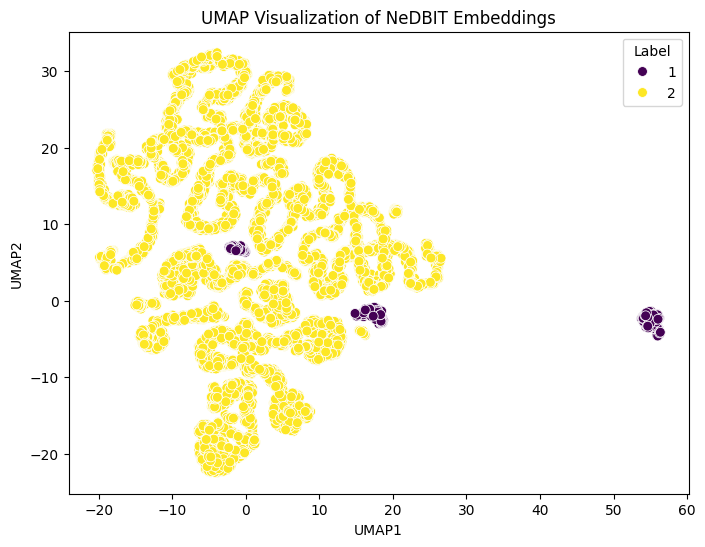

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=1.0)
#, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT Embeddings")
plt.savefig(base_path + "umap_NeDBIT_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [19]:
df_merged_signals = pd.read_csv("data/merged_signals_bc.csv", sep="\t", engine="c")
df_merged_signals

,cg12467416_SEPT9,cg21410897_AAK1,cg21156511_NPLOC4,cg24567897_NIPAL2,cg05421487_AKAP10,cg18546155_NCOA1,cg22689269_EXO5,cg15694422_MGLL,cg02116768_FOXK2,cg04218548_CAMTA1,...,cg07119830_TRIM8,cg22708188_SYNE2,cg22708188_MIR548AZ,cg04611299_LINC00499,cg05956150_RORA,cg03711942_PTCD3,cg01785096_ARHGEF11,cg13843349_CRYBA4,cg03717757_EIF3H,cg00888249_GALNTL6
0,0.442869,0.409950,0.625603,0.900918,0.889177,0.913062,0.947388,0.420649,0.460033,0.827662,...,0.238990,0.928692,0.928692,0.929335,0.908061,0.977211,0.739268,0.198144,0.901964,0.379804
1,0.470753,0.388715,0.657697,0.846108,0.881948,0.888919,0.937989,0.315654,0.534132,0.845404,...,0.188623,0.947337,0.947337,0.870490,0.777820,0.983602,0.676929,0.320568,0.836991,0.430476
2,0.435133,0.406474,0.585801,0.860885,0.890532,0.870431,0.932141,0.371301,0.461211,0.812662,...,0.212172,0.938273,0.938273,0.875035,0.736654,0.984785,0.706739,0.280867,0.770598,0.390168
3,0.432686,0.365672,0.546524,0.879930,0.845392,0.896671,0.887598,0.265431,0.472303,0.818183,...,0.274920,0.833177,0.833177,0.924657,0.882049,0.983611,0.762928,0.198050,0.930718,0.309113
4,0.414197,0.300900,0.519735,0.925803,0.924483,0.950495,0.957536,0.235579,0.392235,0.842532,...,0.238412,0.861853,0.861853,0.947061,0.895565,0.973734,0.759187,0.217224,0.939090,0.314143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.525516,0.524446,0.722934,0.721116,0.776128,0.740774,0.773703,0.560614,0.663921,0.727816,...,0.110749,0.934676,0.934676,0.843087,0.687410,0.984991,0.733553,0.335968,0.760666,0.351063
76,0.452324,0.480424,0.656563,0.808964,0.854183,0.862328,0.883234,0.483471,0.508202,0.797696,...,0.167889,0.982510,0.982510,0.891010,0.780021,0.982797,0.753083,0.273031,0.847166,0.402650
77,0.452633,0.431355,0.602582,0.847401,0.861224,0.849006,0.879325,0.521094,0.490106,0.822492,...,0.314592,0.946952,0.946952,0.913463,0.821109,0.985706,0.735660,0.268770,0.877437,0.346208
78,0.438368,0.457812,0.641296,0.842197,0.837455,0.883265,0.876846,0.464730,0.607031,0.801699,...,0.198730,0.881459,0.881459,0.935488,0.816671,0.982031,0.709490,0.225463,0.921285,0.389728


In [34]:
feature_names = df_labels["feature_name"].tolist()

In [35]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg15694422_MGLL,cg22644321_TRIB1,cg26582754_PHACTR2,cg20758823_RUNX2,cg03688134_PLXNC1,cg19397277_PAG1,cg24597363_MAEA,cg05849676_CLEC12B,cg22014325_RAMP1,cg21627980_DTNBP1,...,cg25511644_POLK,cg25511644_COL4A3BP,cg22992955_LOC100128568,cg22992955_RFX2,cg04153631_TOPORS-AS1,cg04153631_NDUFB6,cg15538837_H3F3A,cg15538837_LOC440926,cg01633693_TXNRD2,cg01633693_COMT
0,0.420649,0.312701,0.413432,0.430651,0.476208,0.509785,0.727852,0.479563,0.534548,0.714092,...,0.051043,0.051043,0.972554,0.972554,0.946254,0.946254,0.019570,0.019570,0.012241,0.012241
1,0.315654,0.229696,0.359373,0.508906,0.497923,0.711849,0.799968,0.583322,0.632019,0.807499,...,0.046175,0.046175,0.976584,0.976584,0.920936,0.920936,0.013034,0.013034,0.016829,0.016829
2,0.371301,0.243923,0.298765,0.430397,0.452600,0.561788,0.760008,0.549297,0.483386,0.680031,...,0.048848,0.048848,0.976904,0.976904,0.936485,0.936485,0.018433,0.018433,0.006531,0.006531
3,0.265431,0.194979,0.326456,0.333302,0.401843,0.422361,0.559697,0.403036,0.519919,0.660694,...,0.047957,0.047957,0.979346,0.979346,0.933528,0.933528,0.020136,0.020136,0.010890,0.010890
4,0.235579,0.192450,0.349825,0.320553,0.362561,0.393438,0.580172,0.467984,0.445557,0.592195,...,0.042422,0.042422,0.978129,0.978129,0.944653,0.944653,0.020040,0.020040,0.014319,0.014319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.560614,0.440183,0.496821,0.597685,0.639386,0.706363,0.871144,0.683096,0.736065,0.880335,...,0.046885,0.046885,0.978474,0.978474,0.934404,0.934404,0.017358,0.017358,0.013892,0.013892
76,0.483471,0.340785,0.488674,0.404161,0.471486,0.617296,0.753473,0.537596,0.701975,0.838957,...,0.061334,0.061334,0.977230,0.977230,0.947136,0.947136,0.015749,0.015749,0.014115,0.014115
77,0.521094,0.258195,0.407097,0.400028,0.509362,0.576948,0.717583,0.715657,0.627916,0.786407,...,0.049970,0.049970,0.984398,0.984398,0.946514,0.946514,0.012381,0.012381,0.007100,0.007100
78,0.464730,0.289059,0.511305,0.422716,0.454152,0.610103,0.724744,0.513202,0.605272,0.726685,...,0.064588,0.064588,0.985193,0.985193,0.939244,0.939244,0.013004,0.013004,0.008429,0.008429


In [36]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
cg15694422_MGLL,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
cg22644321_TRIB1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
cg26582754_PHACTR2,0.413432,0.359373,0.298765,0.326456,0.349825,0.413166,0.329817,0.450359,0.378311,0.391891,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
cg20758823_RUNX2,0.430651,0.508906,0.430397,0.333302,0.320553,0.507053,0.422597,0.413848,0.436435,0.423015,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
cg03688134_PLXNC1,0.476208,0.497923,0.452600,0.401843,0.362561,0.578389,0.437428,0.471390,0.485310,0.504968,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg04153631_NDUFB6,0.946254,0.920936,0.936485,0.933528,0.944653,0.928909,0.943421,0.930962,0.931824,0.942458,...,0.931919,0.935790,0.945331,0.936748,0.930124,0.934404,0.947136,0.946514,0.939244,0.947829
cg15538837_H3F3A,0.019570,0.013034,0.018433,0.020136,0.020040,0.022469,0.017790,0.010093,0.018755,0.011342,...,0.017391,0.015135,0.021978,0.020810,0.018314,0.017358,0.015749,0.012381,0.013004,0.019977
cg15538837_LOC440926,0.019570,0.013034,0.018433,0.020136,0.020040,0.022469,0.017790,0.010093,0.018755,0.011342,...,0.017391,0.015135,0.021978,0.020810,0.018314,0.017358,0.015749,0.012381,0.013004,0.019977
cg01633693_TXNRD2,0.012241,0.016829,0.006531,0.010890,0.014319,0.016698,0.002157,0.004317,0.008047,0.007894,...,0.005928,0.005048,0.005030,0.003845,0.007296,0.013892,0.014115,0.007100,0.008429,0.007972


In [37]:
dnam_signals_transpose.to_csv(base_path + "dnam_signals_transpose.csv")

In [38]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
0,cg15694422_MGLL,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,cg22644321_TRIB1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
2,cg26582754_PHACTR2,0.413432,0.359373,0.298765,0.326456,0.349825,0.413166,0.329817,0.450359,0.378311,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
3,cg20758823_RUNX2,0.430651,0.508906,0.430397,0.333302,0.320553,0.507053,0.422597,0.413848,0.436435,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
4,cg03688134_PLXNC1,0.476208,0.497923,0.452600,0.401843,0.362561,0.578389,0.437428,0.471390,0.485310,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,cg04153631_NDUFB6,0.946254,0.920936,0.936485,0.933528,0.944653,0.928909,0.943421,0.930962,0.931824,...,0.931919,0.935790,0.945331,0.936748,0.930124,0.934404,0.947136,0.946514,0.939244,0.947829
9356,cg15538837_H3F3A,0.019570,0.013034,0.018433,0.020136,0.020040,0.022469,0.017790,0.010093,0.018755,...,0.017391,0.015135,0.021978,0.020810,0.018314,0.017358,0.015749,0.012381,0.013004,0.019977
9357,cg15538837_LOC440926,0.019570,0.013034,0.018433,0.020136,0.020040,0.022469,0.017790,0.010093,0.018755,...,0.017391,0.015135,0.021978,0.020810,0.018314,0.017358,0.015749,0.012381,0.013004,0.019977
9358,cg01633693_TXNRD2,0.012241,0.016829,0.006531,0.010890,0.014319,0.016698,0.002157,0.004317,0.008047,...,0.005928,0.005048,0.005030,0.003845,0.007296,0.013892,0.014115,0.007100,0.008429,0.007972


In [39]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
2,0.413432,0.359373,0.298765,0.326456,0.349825,0.413166,0.329817,0.450359,0.378311,0.391891,...,0.435968,0.389566,0.494176,0.504004,0.452477,0.496821,0.488674,0.407097,0.511305,0.369165
3,0.430651,0.508906,0.430397,0.333302,0.320553,0.507053,0.422597,0.413848,0.436435,0.423015,...,0.510157,0.531396,0.537635,0.501953,0.448602,0.597685,0.404161,0.400028,0.422716,0.466858
4,0.476208,0.497923,0.452600,0.401843,0.362561,0.578389,0.437428,0.471390,0.485310,0.504968,...,0.524155,0.601308,0.613859,0.570519,0.534431,0.639386,0.471486,0.509362,0.454152,0.507358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,0.946254,0.920936,0.936485,0.933528,0.944653,0.928909,0.943421,0.930962,0.931824,0.942458,...,0.931919,0.935790,0.945331,0.936748,0.930124,0.934404,0.947136,0.946514,0.939244,0.947829
9356,0.019570,0.013034,0.018433,0.020136,0.020040,0.022469,0.017790,0.010093,0.018755,0.011342,...,0.017391,0.015135,0.021978,0.020810,0.018314,0.017358,0.015749,0.012381,0.013004,0.019977
9357,0.019570,0.013034,0.018433,0.020136,0.020040,0.022469,0.017790,0.010093,0.018755,0.011342,...,0.017391,0.015135,0.021978,0.020810,0.018314,0.017358,0.015749,0.012381,0.013004,0.019977
9358,0.012241,0.016829,0.006531,0.010890,0.014319,0.016698,0.002157,0.004317,0.008047,0.007894,...,0.005928,0.005048,0.005030,0.003845,0.007296,0.013892,0.014115,0.007100,0.008429,0.007972


In [44]:
n_neighbors=100 #10 #5
min_dist=0.99 #0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

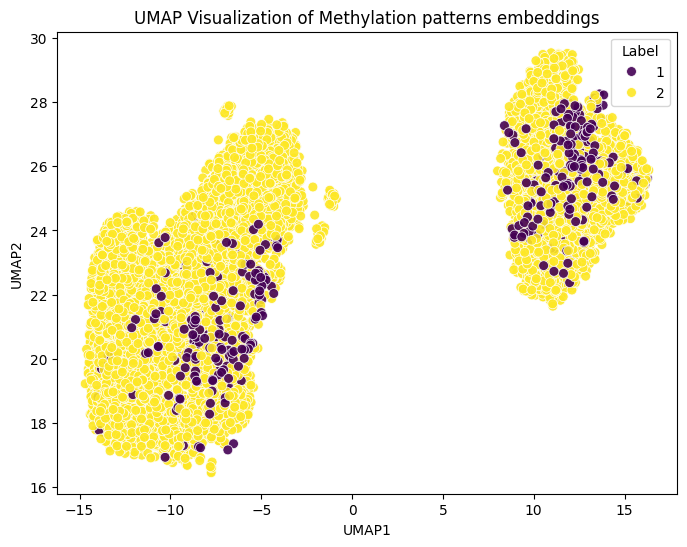

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [128]:
#nebit_features = nebit_features.reset_index()
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,0.814681,0.352461,0.227665
1,1,0.894339,0.771929,0.410495,0.227579
2,1,0.676167,1.393382,1.546465,0.227793
3,1,0.612830,1.706580,1.893043,0.227296
4,1,0.612830,1.706580,1.893043,0.227296
...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155
11752,0,0.000000,-2.361961,0.000000,0.000000
11753,0,0.000000,-2.361961,0.000000,0.000000
11754,3,2.987049,-2.144912,0.000007,0.000422


In [129]:
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,0.817666,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,0.810016,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,0.815616,0.789967,0.865481,0.838889,0.839916,0.832341,0.818169,0.816099,0.827879,0.813686,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,0.638726,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,0.638726,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [130]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = pd.concat([nebit_features, dnam_features], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,1,0.905257,0.814681,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.894339,0.771929,0.410495,0.227579,0.831418,0.778697,0.836100,0.810414,0.807439,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,1,0.676167,1.393382,1.546465,0.227793,0.867871,0.857484,0.886596,0.873939,0.853442,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155,0.815616,0.789967,0.865481,0.838889,0.839916,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,3,2.987049,-2.144912,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [136]:
n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

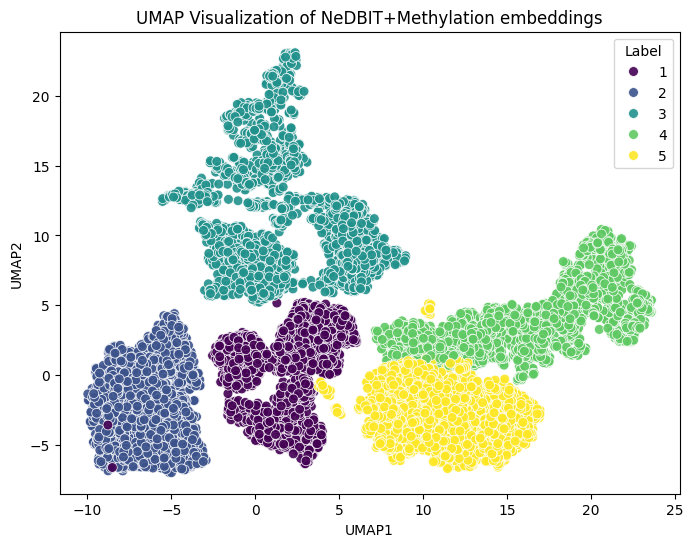

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation embeddings")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [133]:
df_nebit_dnam_features = nebit_dnam_features

In [134]:
df_nebit_dnam_features["labels"] = labels
#df_nebit_dnam_features["feature_names"] = probe_gene_list

In [135]:
file_path = "data/output/" + "df_nebit_dnam_features.csv"
df_nebit_dnam_features.to_csv(file_path, sep="\t", header=None, index=None)
df_nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,25,26,27,28,29,30,31,32,33,labels
0,1,0.905257,0.814681,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1
1,1,0.894339,0.771929,0.410495,0.227579,0.831418,0.778697,0.836100,0.810414,0.807439,...,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737,1
2,1,0.676167,1.393382,1.546465,0.227793,0.867871,0.857484,0.886596,0.873939,0.853442,...,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768,1
3,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902,1
4,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155,0.815616,0.789967,0.865481,0.838889,0.839916,...,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859,5
11752,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461,1
11753,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461,1
11754,3,2.987049,-2.144912,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5


In [62]:
#feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
#feature_gene_names

In [63]:
#df_feature_names = pd.DataFrame(feature_gene_names)
#file_path = base_path + "df_feature_names.csv"
#df_feature_names.to_csv(file_path, sep="\t", index=None)
#df_feature_names

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import umap

base_path = "naipu_processed_data/only_positive_corr_data/"
base_plot_path = "plots/positive_negative_corr_data/"
embed_conv = torch.load(base_path + "embed_conv.pt")
embed_batch_norm = torch.load(base_path + "embed_batch_norm.pt")
true_labels = torch.load(base_path + "true_labels.pt")
true_labels = [int(item) + 1 for item in true_labels]

In [ ]:
n_neighbors=10 #10 #5
min_dist=0.99 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [ ]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

umap_conv_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_conv_embed[:, 0], "UMAP2": umap_conv_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of node embeddings (GNN)")
plt.savefig(base_plot_path + "umap_conv_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [ ]:
#df_output_gene_rankings = pd.read_csv(base_path + "output_gene_ranking_only_positive_corr", sep="\t", header=None)
#df_output_gene_rankings = df_output_gene_rankings.sort_values(by=[0])
#df_output_gene_rankings.to_csv(base_path + "output_gene_ranking_only_positive_corr_sorted", index=None)
#df_output_gene_rankings

In [ ]:
'''probes = dict()
for i, row in df_output_gene_rankings.iterrows():
    r_values = row.values[0].split(" ")
    name = r_values[0]
    p_name = name.split("_")[0]
    if p_name not in probes:
        probes[p_name] = 1
    else:
        probes[p_name] += 1'''

In [ ]:
#dict(sorted(probes.items(), key=lambda item: item[1], reverse=True))

In [ ]:
import pandas as pd
import numpy as np

path = "naipu_processed_data/only_positive_corr_data/"
df_test_data = pd.read_csv(path + "df_nebit_dnam_features.csv", sep="\t", header=None)
df_test_data

In [ ]:
df_f_name_labels = df_test_data.loc[:, 39:]
df_f_name_labels

In [ ]:
df_seeds = pd.read_csv(path + "seed_features.tsv", sep="\t", header=None)
df_seeds